# Operator Telekomunikasi Megaline

Analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Data terdiri dari:

- Siapa mereka, 
- Dari mana mereka, 
- Jenis paket apa yang mereka gunakan, 
- Jumlah panggilan dan pesan yang mereka kirim di tahun 2018

Data terdiri dari 5 csv file:
- megaline_calls.csv
- megaline_internet.csv
- megaline_messages.csv Unduh dataset
- megaline_plans.csv
- megaline_users.csv

**Objective:**
- **Menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan**

**Step:**
- Pengecekan Kualitas Data
- Modifikasi Data
- Analisis Data; Mendeskripsikan perilaku konsumen
- Uji Hipotesis
  - Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
  - Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain

## Import data & libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

In [ ]:
call = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
message = pd.read_csv('/datasets/megaline_messages.csv')
plan = pd.read_csv('/datasets/megaline_plans.csv')
user = pd.read_csv('/datasets/megaline_users.csv')

## Pengecekan Kualitas Data

### Data `call`

In [ ]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


- `id` — ID sesi web unik
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)
- `user_id` — ID pengguna yang melakukan panggilan

------

- Tidak ada missing value
- Tipe data pada kolom `call_date` akan dirubah menjadi datetime

-----

In [ ]:
# Mengubah tipe data kolom call_date menjadi datetime

call['call_date'] = pd.to_datetime(call['call_date'], format = '%Y-%m-%d')

In [ ]:
call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
call.duplicated().sum()

0

------------------

Durasi minimal call adalah 0.0

Nilai 0.0 pada kolom ini akan dihapus karena tidak mengurangi kuota telfon dan data 0.0 ini akan mempengaruhi median dan distribusi data

-----

In [ ]:
# drop duration == 0

call = call[call['duration'] > 0]

In [ ]:
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Data `internet`

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


- `id` — ID sesi web unik
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)
- `session_date` — tanggal sesi web
- `user_id` — ID pengguna

------

- Tidak ada missing value
- Tipe data pada kolom `session_date` akan dirubah menjadi datetime

-----

In [ ]:
# Mengubah tipe data kolom session_date menjadi datetime

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [ ]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
internet.duplicated().sum()

0

------------------

Mb data used minimal adalah 0.0

Nilai 0.0 pada kolom ini akan dihapus karena tidak mengurangi kuota internet dan data 0.0 ini akan mempengaruhi median dan distribusi data

-----

In [ ]:
# drop session == 0

internet = internet[internet['mb_used'] > 0]

In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


### Data `message`

In [ ]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

------

- Tidak ada missing value
- Tipe data pada kolom `message_date` akan dirubah menjadi datetime

-----

In [ ]:
# Mengubah tipe data kolom message_date menjadi datetime

message['message_date'] = pd.to_datetime(message['message_date'], format = '%Y-%m-%d')

In [ ]:
message.duplicated().sum()

0

In [ ]:
message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Data `plan`

In [ ]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
- `usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
- `usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

----------

Tidak ada missing value dan semua tipe data sudah sesuai

-----------

In [ ]:
plan

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Data `user`

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age` — usia pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (yyyy-mm-dd)
- `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

-----------

- Terdapat missing value pada `churn_date`. Ini terjadi karena pelanggan masih menjalankan paketnya ketika data di collect
- Tipe data kolom `reg_date` akan dirubah menjadi datetime

---------

In [ ]:
user.duplicated().sum()

0

In [ ]:
# Mengubah tipe data kolom reg_date & churn_date menjadi datetime

user['reg_date'] = pd.to_datetime(user['reg_date'], format = '%Y-%m-%d')
user['churn_date'] = pd.to_datetime(user['churn_date'], format = '%Y-%m-%d')

In [ ]:
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


## Modifikasi Data

- Mencari jumlah `call` dan total menit `call` per bulan untuk setiap user
- Mencari total `message` per bulan untuk setiap user
- Mencari total `mb_used` per bulan untuk setiap user
- Mencari pendapatan bulanan untuk setiap user

-------

Setelah dilakukan modifikasi data lebih lanjut, terdapat value yang masih terisi ketika user sudah tidak berlangganan paket. Misalnya:
- `churn_date` user adalah bulan 9
- `reg_date` user adalah bulan 4

Tetapi pada bulan 10 sampai bulan 12 masih terdapat value yang berisi jumlah durasi call yang dilakukan user yang mana hal ini merupakan kesalahan karena user telah berhenti berlangganan pada bulan 9

**Maka semua value yang bukan null setelah `churn_date` akan di assign dengan `np.nan`**

In [ ]:
def value_cleansing (dataframe):
  '''
    I.S: dataframe count (eg: minute_count, internet_count) masih berisi value yang keliru seperti yang sudah dijelaskan pada awal bab Modifikasi Data
    F.S: return dataframe dengan value yang sudah diperbaiki

    Parameters:
    -----------
        dataframe:
            Dataframe count (eg: minute_count, internet_count)
    '''

  for i in dataframe.index:
    reg = dataframe.iloc[i]['reg_date'].month
    if pd.isnull(dataframe.iloc[i]['churn_date']) == False:
      stop = dataframe.iloc[i]['churn_date'].month
    elif pd.isnull(dataframe.iloc[i]['churn_date']) == True:
      stop = 12

    for j in range(reg, stop+1):
      if pd.isnull(dataframe.iloc[i][j]) == True:
        dataframe.iloc[i, j] = 0

    if stop+1 < 12:
      for k in range(stop+1, 13):
        dataframe.iloc[i,k] = np.nan

  return dataframe

### Mencari jumlah `call` dan total menit `call` per bulan untuk setiap user

In [ ]:
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
# Mencari jumlah call per bulan untuk setiap user

call_count = pd.DataFrame(data=user['user_id'])

for i in range(1, 13): #loop dimulai dari bulan 1 sampai 12
    temp = call[call['call_date'].dt.month == i]
    temp = temp.groupby('user_id')['duration'].count().reset_index()
    temp = temp.rename(columns={'duration': f'{i}'})
    call_count = call_count.merge(temp, on= 'user_id', how= 'left')


call_count = call_count.merge(user[['user_id', 'plan', 'reg_date', 'churn_date']], on= 'user_id', how= 'left')

In [ ]:
call_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,47.0,49.0,46.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,48.0,38.0,surf,2018-10-21,NaT
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,47.0,45.0,43.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,49.0,70.0,61.0,71.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,50.0,65.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,NaN,61.0,94.0,103.0,88.0,92.0,93.0,80.0,87.0,surf,2018-04-22,NaT


In [ ]:
# Atasi value yang bermasalah

call_count = value_cleansing(call_count)

In [ ]:
call_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,38.0,47.0,49.0,46.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,48.0,38.0,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,19.0,33.0,45.0,42.0,32.0,47.0,45.0,43.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,50.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56.0,49.0,70.0,61.0,71.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,54.0,50.0,65.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,61.0,94.0,103.0,88.0,92.0,93.0,80.0,87.0,surf,2018-04-22,NaT


In [ ]:
# Mencari total minute per bulan untuk setiap user

minute_count = pd.DataFrame(data=user['user_id'])

for i in range(1, 13): #loop dimulai dari bulan 1 sampai 12
    temp = call[call['call_date'].dt.month == i]
    temp = temp.groupby('user_id')['duration'].sum().reset_index()
    temp = temp.rename(columns={'duration': f'{i}'})
    minute_count = minute_count.merge(temp, on= 'user_id', how= 'left')

minute_count = minute_count.merge(user[['user_id', 'plan','reg_date', 'churn_date']], on= 'user_id', how= 'left')

In [ ]:
minute_count = value_cleansing(minute_count)

In [ ]:
minute_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.14,297.69,374.11,404.59,392.93,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.13,359.76,363.24,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,470.22,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.32,54.79,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.00,427.95,375.83,610.65,490.29,579.43,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,450.21,422.81,600.29,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,498.93,775.52,826.74,680.39,730.47,696.35,668.57,712.71,surf,2018-04-22,NaT


### Mencari total `message` per bulan untuk setiap user

In [ ]:
message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
# Mencari jumlah message per bulan untuk setiap user

message_count = pd.DataFrame(data=user['user_id'])

for i in range(1, 13): #loop dimulai dari bulan 1 sampai 12
    temp = message[message['message_date'].dt.month == i]
    temp = temp.groupby('user_id')['id'].count().reset_index()
    temp = temp.rename(columns={'id': f'{i}'})
    message_count = message_count.merge(temp, on= 'user_id', how= 'left')

message_count = message_count.merge(user[['user_id', 'plan','reg_date', 'churn_date']], on= 'user_id', how= 'left')

In [ ]:
message_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0,surf,2018-10-21,NaT
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,139.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,47.0,59.0,48.0,50.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,37.0,26.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surf,2018-04-22,NaT


In [ ]:
message_count = value_cleansing(message_count)

In [ ]:
message_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,139.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51.0,47.0,59.0,48.0,50.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,21.0,37.0,26.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,surf,2018-04-22,NaT


### Mencari total `mb_used` per bulan untuk setiap user

In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


In [ ]:
# Mencari jumlah mb_used per bulan untuk setiap user

internet_count = pd.DataFrame(data=user['user_id'])

for i in range(1, 13): #loop dimulai dari bulan 1 sampai 12
    temp = internet[internet['session_date'].dt.month == i]
    temp = temp.groupby('user_id')['mb_used'].sum().reset_index()
    temp = temp.rename(columns={'mb_used': f'{i}'})
    internet_count = internet_count.merge(temp, on= 'user_id', how= 'left')

internet_count = internet_count.merge(user[['user_id', 'plan', 'reg_date', 'churn_date']], on= 'user_id', how= 'left')
internet_count[internet_count.columns[1:13]] = internet_count[internet_count.columns[1:13]] / 1024  # Konversi mb menjadi gb

In [ ]:
internet_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.856904,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.756982,13.002754,21.807119,18.070605,18.915215,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.398447,18.891680,14.058828,surf,2018-10-21,NaT
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.410293,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,6.393760,20.188301,23.942012,27.325918,18.410859,14.200811,21.338652,20.887979,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.738447,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019893,31.366035,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.867070,27.464795,36.997686,23.763672,28.387969,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.706045,23.121797,14.345049,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,NaN,19.911523,18.404199,29.708643,23.981953,20.471094,22.133633,24.876396,23.361914,surf,2018-04-22,NaT


In [ ]:
internet_count = value_cleansing(internet_count)

In [ ]:
internet_count.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.856904,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.756982,13.002754,21.807119,18.070605,18.915215,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.398447,18.891680,14.058828,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.410293,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,6.393760,20.188301,23.942012,27.325918,18.410859,14.200811,21.338652,20.887979,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,16.738447,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019893,31.366035,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,23.867070,27.464795,36.997686,23.763672,28.387969,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,16.706045,23.121797,14.345049,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,19.911523,18.404199,29.708643,23.981953,20.471094,22.133633,24.876396,23.361914,surf,2018-04-22,NaT


In [ ]:
# Menghapus variable yang tidak dipakai lagi

del call, message, internet, plan, temp

### Mencari revenue bulanan untuk setiap user

In [ ]:
# Membuat dict berisi peraturan paket

jenis_paket = {
    'surf' : 20,     # satuan dolar
    'ultimate' : 70  # satuan dolar
}
base_cost = {
    'surf' : {'minute': 500, 'message': 50, 'gb': 15},
    'ultimate' : {'minute': 3000, 'message': 1000, 'gb': 30}
}

additional_cost = {
    'surf' : {'minute': 0.03, 'message': 0.03, 'gb': 10},    # satuan dolar
    'ultimate' : {'minute': 0.01, 'message': 0.01, 'gb': 7}  # satuan dolar
}

In [ ]:
# Membuat fungsi untuk menghitung berapa additional cost

def add_cost(dataframe, base_cost = base_cost, additional_cost = additional_cost, kind = '', np_ceil = ''):
  '''
    I.S: input dataframe count (eg: minute_count, internet_count)
    F.S: dataframe baru yang berisi additional cost jika penggunaan user melebihi kuota yang telah ditetapkan untuk masing-masing paket
         Jika tidak melebihi kuota maka valuenya di set menjadi 0

    Parameters:
    -----------
        dataframe:
            Dataframe count (eg: minute_count, internet_count)
        base_cost:
            dictionary base_cost
        additional_cost:
            dictionary additional_cost
        kind:
            'minute' atau 'message' atau 'gb'
        np_ceil:
            'yes' jika value dataframe harus dilakukan pembulatkan keatas
    '''
  df = pd.DataFrame(data = dataframe)
  if np_ceil == 'yes':
    df[df.columns[1:13]] = dataframe[dataframe.columns[1:13]].apply(np.ceil)
  
  df_surf = pd.DataFrame()
  df_ultimate = pd.DataFrame()
  df_all = pd.DataFrame()

  df_surf = df[df['plan'] == 'surf']
  df_ultimate = df[df['plan'] == 'ultimate']
  list_table = [df_surf, df_ultimate]

  for i in list_table:
    i[i.columns[1:13]] = i[i.columns[1:13]] - base_cost[i.iloc[0]['plan']][kind]
    for j in i[i.columns[1:13]]:
      i.loc[i[j]< 0, j] = 0
      i.loc[i[j] > 0, j] = i[j] * additional_cost[i.iloc[0]['plan']][kind]

  df_all = df_surf.append(df_ultimate, ignore_index = True)
  df_all.sort_values(by = 'user_id', inplace = True)
  df_all.reset_index(drop = True, inplace = True)
  
  return df_all

#### Mencari additional cost dari paket call

I.S:
- Dataframe minute_count berisi jumlah menit yang dihabiskan setiap bulannya. Value tersebut akan dikurangi dengan base cost yang sudah tertera untuk masing-masing paket
- Apabila hasilnya <= 0 maka nilai tersebut akan diganti dengan 0 karena nilai <= 0 mengindikasikan bahwa tidak ada additional cost
- Jika hasilnya > 0 maka nilai tersebut akan dikalikan dengan additional cost yang sudah tertera untuk masing-masing paket

F.S:
- Dua dataframe baru yang berasal dari dataframe awal minute_count
- Dua dataframe baru ini berisi jumlah additional cost setiap bulannya untuk setiap user pada masing-masing paket

In [ ]:
# Apply fungsi

add_minute = add_cost(minute_count, kind = 'minute', np_ceil = 'yes')

In [ ]:
add_minute.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,16.23,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,3.33,0.00,2.40,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,0.0,8.28,9.81,5.43,6.93,5.91,5.07,6.39,surf,2018-04-22,NaT


#### Mencari additional cost dari paket message

In [ ]:
# Apply fungsi

add_message = add_cost(message_count, kind = 'message', np_ceil = 'no')

In [ ]:
add_message.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.09,0.0,0.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.03,0.0,0.27,0.0,0.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.00,0.0,0.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,surf,2018-04-22,NaT


#### Mencari additional cost dari paket internet

In [ ]:
# Apply fungsi

add_internet = add_cost(internet_count, kind = 'gb', np_ceil = 'yes')

In [ ]:
add_internet.head(n=10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,70.0,40.0,40.0,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.0,0.0,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,0.0,60.0,90.0,130.0,40.0,0.0,70.0,60.0,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.0,130.0,220.0,90.0,140.0,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,50.0,40.0,150.0,90.0,60.0,80.0,100.0,90.0,surf,2018-04-22,NaT


#### Total Revenue bulanan per user masing - masing paket

In [ ]:
total_revenue = pd.DataFrame(data = add_minute)
total_revenue[total_revenue.columns[1:13]] = add_message[add_message.columns[1:13]] + add_internet[add_internet.columns[1:13]] + add_minute[add_minute.columns[1:13]]

In [ ]:
total_revenue.head(n=10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,70.09,40.00,40.00,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,40.00,0.00,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,136.23,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,0.0,60.00,90.00,130.00,40.00,0.00,70.00,60.00,surf,2018-05-23,NaT
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,20.00,surf,2018-11-29,NaT
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,14.00,ultimate,2018-11-27,2018-12-18
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,0.00,90.03,130.00,223.60,90.00,142.40,surf,2018-07-11,NaT
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,ultimate,2018-08-03,NaT
9,1009,NaN,NaN,NaN,0.0,50.0,48.28,159.81,95.43,66.93,85.91,105.07,96.39,surf,2018-04-22,NaT


In [ ]:
# Menambahkan harga basic masing-masing paket
# {'surf': 20, 'ultimate': 70} satuan dollar

def base_add (dataframe, jenis_paket = jenis_paket):
  for i in dataframe.index:
    reg = dataframe.iloc[i]['reg_date'].month
    if pd.isnull(dataframe.iloc[i]['churn_date']) == False:
      stop = dataframe.iloc[i]['churn_date'].month
    elif pd.isnull(dataframe.iloc[i]['churn_date']) == True:
      stop = 12
    plan = dataframe.iloc[i]['plan']
    
    if plan == 'surf':  
      for j in range(reg, stop+1):
        dataframe.iloc[i, j] = dataframe.iloc[i, j] + jenis_paket[plan]

    elif plan == 'ultimate':
      for j in range(reg, stop+1):
        dataframe.iloc[i, j] = dataframe.iloc[i, j] + jenis_paket[plan]

  return dataframe

In [ ]:
# Apply fungsi untuk mencari total pendapatan per user setiap bulan
total_revenue = base_add(total_revenue)

# Merge dengan kolom city untuk pengujian hipotesis
total_revenue = total_revenue.merge(user[['user_id', 'city']], on = 'user_id', how= 'left')
total_revenue = total_revenue.drop(['reg_date', 'churn_date'], axis=1)

In [ ]:
total_revenue.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,city
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,90.09,60.00,60.00,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,60.00,20.00,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,20.0,20.0,20.0,20.0,20.0,20.00,20.00,20.00,20.00,20.00,20.00,156.23,surf,"Tulsa, OK MSA"
4,1004,NaN,NaN,NaN,NaN,20.0,80.00,110.00,150.00,60.00,20.00,90.00,80.00,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,40.00,surf,"Dallas-Fort Worth-Arlington, TX MSA"
6,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,84.00,ultimate,"San Francisco-Oakland-Berkeley, CA MSA"
7,1007,NaN,NaN,NaN,NaN,NaN,NaN,20.00,110.03,150.00,243.60,110.00,162.40,surf,"Grand Rapids-Kentwood, MI MSA"
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,70.00,70.00,70.00,70.00,ultimate,"Orlando-Kissimmee-Sanford, FL MSA"
9,1009,NaN,NaN,NaN,20.0,70.0,68.28,179.81,115.43,86.93,105.91,125.07,116.39,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA"


In [ ]:
# Menghapus variable yang tidak dipakai lagi

del add_minute, add_message, add_internet

## Analisis Data

Mencari deskripsi perilaku konsumen melalui:
- Menit yang dibutuhkan pengguna setiap paket per bulan
- Pesan yang dibutuhkan pengguna setiap paket per bulan
- Volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan

Lalu menghitung rata-rata, varians, dan standar deviasi serta membuat histogram

In [ ]:
# I.S: input dataframe dengan 'plan' yang sama
# F.S: return mean, std, dan var dari dataframe tersebut

def analisis_data (dataframe, n_output = 4):
  df = dataframe['1']
  for i in dataframe.columns[2:13]:
    df = df.append(dataframe[i], ignore_index = True)

  df = df[df > 0]
  mean = df.describe()['mean']
  std = df.describe()['std']
  var = np.var(df)

  if n_output == 4:
    return df, mean, std, var
  else:
    return df

### Mencari menit

In [ ]:
minute_count.head()

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,plan,reg_date,churn_date
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.83,ultimate,2018-12-24,NaT
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.14,297.69,374.11,404.59,392.93,surf,2018-08-13,NaT
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.13,359.76,363.24,surf,2018-10-21,NaT
3,1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00,surf,2018-01-28,NaT
4,1004,NaN,NaN,NaN,NaN,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53,surf,2018-05-23,NaT


#### Paket surf

In [ ]:
# Membelah dataframe berdasarkan plan

minute_surf = pd.DataFrame(data = minute_count[minute_count['plan'] == 'surf'].reset_index(drop = True))
minute_ultimate = pd.DataFrame(data = minute_count[minute_count['plan'] == 'ultimate'].reset_index(drop = True))

In [ ]:
# Apply fungsi

minute_surf_list, mean, std, var = analisis_data(minute_surf)

In [ ]:
print(f'Rata-rata durasi panggilan perbulannya pada paket surf adalah: {mean}')
print()
print(f'Standar deviasi durasi panggilan perbulannya pada paket surf adalah: {std}')
print()
print(f'Variance durasi panggilan perbulannya pada paket surf adalah: {var}')

Rata-rata durasi panggilan perbulannya pada paket surf adalah: 412.80188728702484

Standar deviasi durasi panggilan perbulannya pada paket surf adalah: 217.2733970793549

Variance durasi panggilan perbulannya pada paket surf adalah: 47176.7934761236


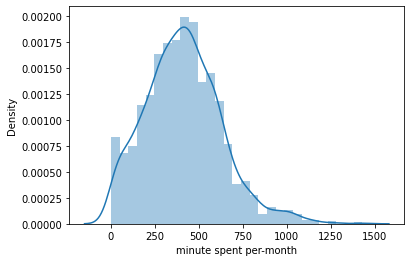

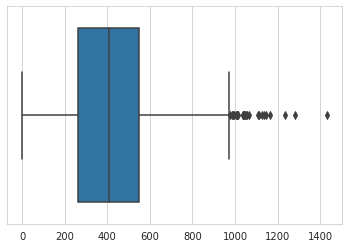

In [ ]:
# Melihat distribusi & boxplot

plt.xlabel('minute spent per-month')
sns.distplot(minute_surf_list);
plt.show()

sns.set_style("whitegrid")
sns.boxplot(minute_surf_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari minute spent pengguna berada di sekitar angka 400 menit
- Lebih banyak data tersebar di atas Q2 dengan nilai max di sekitar angka 1400
- Batas telepon pada paket ini adalah 500 menit dan dengan melihat boxplot terdapat sekitar 25% data yang melebihi batas 500 menit tersebut

#### Paket ultimate

In [ ]:
# Apply fungsi

minute_ultimate_list, mean, std, var = analisis_data(minute_ultimate)

In [ ]:
print(f'Rata-rata durasi panggilan perbulannya pada paket ultimate adalah: {mean}')
print()
print(f'Standar deviasi durasi panggilan perbulannya pada paket ultimate adalah: {std}')
print()
print(f'Variance durasi panggilan perbulannya pada paket ultimate adalah: {var}')

Rata-rata durasi panggilan perbulannya pada paket ultimate adalah: 410.87955840455834

Standar deviasi durasi panggilan perbulannya pada paket ultimate adalah: 224.58291407619257

Variance durasi panggilan perbulannya pada paket ultimate adalah: 50365.637025303564


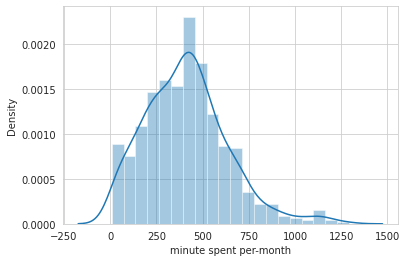

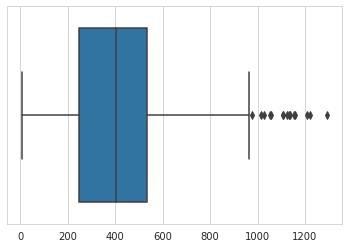

In [ ]:
# Melihat distribusi & boxplot

plt.xlabel('minute spent per-month')
sns.distplot(minute_ultimate_list);
plt.show()

sns.boxplot(minute_ultimate_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari minute spent pengguna berada di sekitar angka 400 menit. Kurang lebih sama dengan `paket surf`
- Lebih banyak data tersebar di atas Q2 dengan nilai max di sekitar angka 1400. Mirip dengan `paket surf`
- Batas telepon pada paket ini adalah 3000 menit dan dengan melihat boxplot di atas dapat disimpulkan bahwa user yang berlangganan paket ini tidak ada yang melebihi kuota yang di tetapkan

**Kesimpulan pada kuota telepon antar dua paket**

Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Pada kuota telepon ini, sekitar 25% user paket surf melebihi batas kuota yang ditetapkan

### Mencari message

#### Paket surf

In [ ]:
# Membelah dataframe berdasarkan plan

message_surf = pd.DataFrame(data = message_count[message_count['plan'] == 'surf'].reset_index(drop = True))
message_ultimate = pd.DataFrame(data = message_count[message_count['plan'] == 'ultimate'].reset_index(drop = True))

In [ ]:
# Apply fungsi

message_surf_list, mean, std, var = analisis_data(message_surf)

In [ ]:
print(f'Rata-rata total message terkirim perbulannya pada paket surf adalah: {mean}')
print()
print(f'Standar deviasi message terkirim perbulannya pada paket surf adalah: {std}')
print()
print(f'Variance message terkirim perbulannya pada paket surf adalah: {var}')

Rata-rata total message terkirim perbulannya pada paket surf adalah: 40.120860927152314

Standar deviasi message terkirim perbulannya pada paket surf adalah: 33.18433308266677

Variance message terkirim perbulannya pada paket surf adalah: 1100.2883727687383


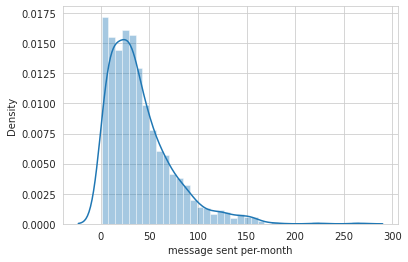

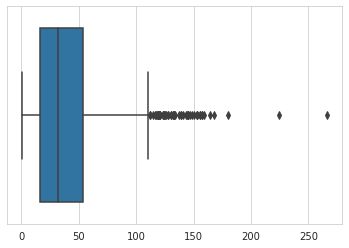

In [ ]:
# Melihat distribusi & boxplot
plt.xlabel('message sent per-month')
sns.distplot(message_surf_list);
plt.show()

sns.boxplot(message_surf_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari message sent user berada di sekitar angka 25.
- Lebih banyak data tersebar di atas Q2 dengan nilai max di sekitar angka 270
- Batas sms pada paket ini adalah 50 sms dan dengan melihat boxplot terdapat sekitar 25% data yang melebihi batas 50 sms tersebut

#### Paket ultimate

In [ ]:
# Apply fungsi

message_ultimate_list, mean, std, var = analisis_data(message_ultimate)

In [ ]:
print(f'Rata-rata total message terkirim perbulannya pada paket ultimate adalah: {mean}')
print()
print(f'Standar deviasi message terkirim perbulannya pada paket ultimate adalah: {std}')
print()
print(f'Variance message terkirim perbulannya pada paket ultimate adalah: {var}')

Rata-rata total message terkirim perbulannya pada paket ultimate adalah: 46.611111111111114

Standar deviasi message terkirim perbulannya pada paket ultimate adalah: 33.02344065736097

Variance message terkirim perbulannya pada paket ultimate adalah: 1088.6543209876543


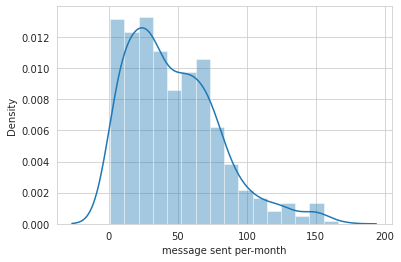

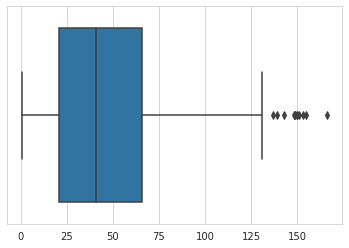

In [ ]:
# Melihat distribusi & boxplot

plt.xlabel('message sent per-month')
sns.distplot(message_ultimate_list);
plt.show()

sns.boxplot(message_ultimate_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari minute spent pengguna berada di sekitar angka 25. Kurang lebih sama dengan `paket surf`
- Lebih banyak data tersebar di atas Q2 dengan nilai max sekitar 170. Selisih 100 dengan `paket surf`
- Batas sms pada paket ini adalah 1000 dan dengan melihat boxplot di atas dapat disimpulkan bahwa user yang berlangganan paket ini tidak ada yang melebihi kuota yang di tetapkan

**Kesimpulan pada kuota telepon antar dua paket**

Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Pada kuota sms ini, sekitar 25% user paket surf melebihi batas kuota yang ditetapkan

### Mencari mb used

#### Paket surf

In [ ]:
# Membelah dataframe berdasarkan plan

internet_surf = pd.DataFrame(data = internet_count[internet_count['plan'] == 'surf'].reset_index(drop = True))
internet_ultimate = pd.DataFrame(data = internet_count[internet_count['plan'] == 'ultimate'].reset_index(drop = True))

In [ ]:
# Apply fungsi

internet_surf_list, mean, std, var = analisis_data(internet_surf)

In [ ]:
print(f'Rata-rata total mb used perbulannya pada paket surf adalah: {mean}')
print()
print(f'Standar deviasi mb used perbulannya pada paket surf adalah: {std}')
print()
print(f'Variance mb used perbulannya pada paket surf adalah: {var}')

Rata-rata total mb used perbulannya pada paket surf adalah: 16.852597402597404

Standar deviasi mb used perbulannya pada paket surf adalah: 7.711814670803646

Variance mb used perbulannya pada paket surf adalah: 59.43346727947376


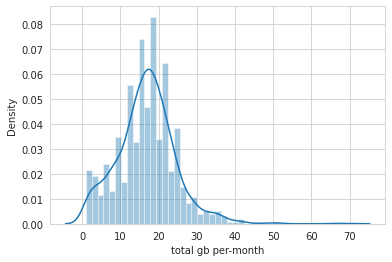

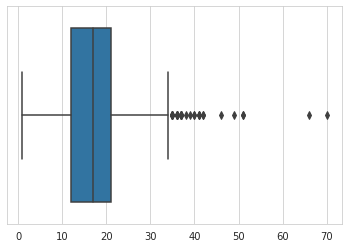

In [ ]:
# Melihat distribusi & boxplot

plt.xlabel('total gb per-month')
sns.distplot(internet_surf_list);
plt.show()

sns.boxplot(internet_surf_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari gb used berada di sekitar angka 17
- Lebih banyak data tersebar di atas Q2 dengan nilai max di sekitar angka 70
- Bata kuota paket ini mendekati dengan median data yaitu 15
- Dengan melihat boxplot terdapat sekitar 50% data yang melebihi batas 15 gb tersebut

#### Paket ultimate

In [ ]:
# Apply fungsi

internet_ultimate_list, mean, std, var = analisis_data(internet_ultimate)

In [ ]:
print(f'Rata-rata total mb used perbulannya pada paket ultimate adalah: {mean}')
print()
print(f'Standar deviasi mb used perbulannya pada paket ultimate adalah: {std}')
print()
print(f'Variance mb used perbulannya pada paket ultimate adalah: {var}')

Rata-rata total mb used perbulannya pada paket ultimate adalah: 17.352609308885754

Standar deviasi mb used perbulannya pada paket ultimate adalah: 7.670274974333751

Variance mb used perbulannya pada paket ultimate adalah: 58.75013776132378


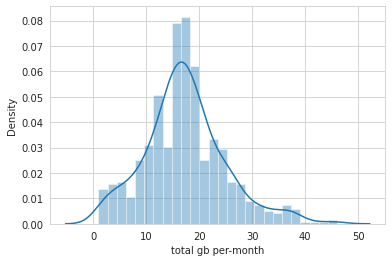

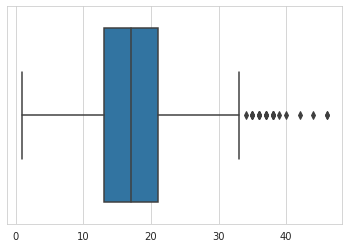

In [ ]:
plt.xlabel('total gb per-month')
sns.distplot(internet_ultimate_list);
plt.show()


sns.boxplot(internet_ultimate_list);
plt.show()

Pada distribusi graph & boxplot diatas dapat dilihat bahwa:
- Peak dari gb used berada di sekitar angka 15. Kurang lebih sama dengan `paket surf`
- Lebih banyak data tersebar di atas Q2 dengan nilai max sekitar 45. Selisih 25 dengan `paket surf`
- Batas gb used paket ini adalah 30 dan dengan melihat boxplot di atas dapat dilihat bahwa ada sedikit user yang melebihi batas paket yang telah ditentukan

**Kesimpulan pada kuota telepon antar dua paket**

Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Pada kuota internet ini, sekitar 50% user paket surf melebihi batas kuota yang ditetapkan dan hanya sedikit user paket ultimate yang melebihi kuota

In [ ]:
del minute_count, call_count, message_count, internet_count

## Uji Hipotesis

### Hipotesis berdasarkan jenis paket

H0 : Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah **SAMA**

H1 : Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah **BERBEDA**

In [ ]:
revenue_surf = total_revenue[total_revenue['plan'] == 'surf']
revenue_ultimate = total_revenue[total_revenue['plan'] == 'ultimate']

In [ ]:
revenue_surf_list = analisis_data(revenue_surf, n_output = 1)
revenue_ultimate_list = analisis_data(revenue_ultimate, n_output = 1)

In [ ]:
revenue_surf_list

2        20.0
14       20.0
21       20.0
25       20.0
35       20.0
        ...  
4063     20.0
4064    110.0
4065     40.0
4066    100.0
4067     90.0
Length: 2247, dtype: float64

In [ ]:
print(f'variance revenue_surf adalah: {np.var(revenue_surf_list)}')
print(f'variance revenue_ultimate adalah: {np.var(revenue_ultimate_list)}')


variance revenue_surf adalah: 2462.2913614335803
variance revenue_ultimate adalah: 88.35148874364562


In [ ]:
equal_variance = np.var(revenue_surf_list)/np.var(revenue_ultimate_list)

if equal_variance < 4:
    print('variance setara')
else:
    print('variance tidak setara')

variance tidak setara


In [ ]:
alpha = 0.05
result = st.ttest_ind(revenue_surf_list, revenue_ultimate_list, equal_var = False)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 diterima')


1.081384043833917e-96

H0 ditolak


**Hasilnya: Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah BERBEDA**

In [ ]:
# Rata - rata pendapatan antara dua paket

print(f'Rata-rata revenue paket surf adalah: {revenue_surf_list.mean()}')
print(f'Rata-rata revenue paket ultimate adalah: {revenue_ultimate_list.mean()}')
print()
print('Rata-rata revenue paket ultimate lebih tinggi dari paket surf dengan selisih 24 USD')

Rata-rata revenue paket surf adalah: 47.90145527369826
Rata-rata revenue paket ultimate adalah: 71.55555555555556

Rata-rata revenue paket ultimate lebih tinggi dari paket surf dengan selisih 24 USD


### Hipotesis berdasarkan lokasi

H0 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah **SAMA**

H1 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah **BERBEDA**

In [ ]:
new_york = total_revenue[total_revenue['city'].str.contains('NY-NJ')].reset_index(drop = True)
other_city = total_revenue[~total_revenue['city'].str.contains('NY-NJ')].reset_index(drop = True)

In [ ]:
new_york_list = analisis_data(new_york, n_output = 1)
other_city_list = analisis_data(other_city, n_output = 1)

In [ ]:
print(f'variance revenue_surf adalah: {np.var(new_york_list)}')
print(f'variance revenue_ultimate adalah: {np.var(other_city_list)}')

In [ ]:
equal_variance = np.var(new_york_list)/np.var(other_city_list)

if equal_variance < 4:
    print('variance setara')
else:
    print('variance tidak setara')

In [ ]:
alpha = 0.05
result = st.ttest_ind(new_york_list, other_city_list, equal_var = True)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 ditolak')
else:
    print('H0 diterima')


**Hasilnya: Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah BERBEDA**

## Kesimpulan

### Pengecekan Kualitas Data
1. Tidak ada nilai yang duplikat
2. Mengubah semua tipe data pada kolom date menjadi pd.datetime
3. Menghapus value 0 pada dataframe `call` kolom `duration`
4. Menghapus value 0 pada dataframe `internet` kolom `mb_used`


### Modifikasi Data
1. Terdapat kesalahan pada data yang mana call, sms, dan internet masih di record walaupun user telah berhenti berlangganan paket. Semua record call, sms, dan internet user yang berhenti dihapus
2. membuat tabel `minute_count` yang berisi total minute spent per-bulan untuk setiap user
3. membuat tabel `message_count` yang berisi total message sent per-bulan untuk setiap user
4. membuat tabel `internet_count` yang berisi total mb_used per-bulan untuk setiap user
5. membuat tabel `revenue_total` yang berisi total revenue per-bulan untuk setiap user



### Analisis Data
#### Mencari total minute spent yang digunakan pengguna setiap paket per bulan
- Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Dapat dikatakan bahwa perilaku user `surf` dan `ultimate` dalam minute spent per-month adalah SAMA

#### Mencari total message sent yang digunakan pengguna setiap paket per bulan
- Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Dapat dikatakan bahwa perilaku user `surf` dan `ultimate` dalam message sent per-month adalah **SAMA**

#### Mencari total gb used yang digunakan pengguna setiap paket per bulan
- Kedua paket memiliki rata-rata yang tidak jauh berbeda satu sama lain dan dengan distribusi yang tidak jauh berbeda. Dapat dikatakan bahwa perilaku user `surf` dan `ultimate` dalam gb used per-month adalah **SAMA**


### Uji Hipotesis
#### Pengujian hipotesis berdasarkan jenis paket

H0 : Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah SAMA

H1 : Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah BERBEDA

Dengan *p-value* = 1.081384043833917e-96, maka hasilnya adalah: **Rata-rata pendapatan dari pengguna paket Ultimate dan Surf adalah BERBEDA**


#### Pengujian hipotesis berdasarkan lokasi

H0 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah SAMA

H1 : Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah BERBEDA

Dengan *p-value* = 0.03662330502894391, maka hasilnya adalah: **Rata-rata pendapatan dari pengguna di wilayah NY-NJ dan wilayah lain adalah BERBEDA**


#### Result
Menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan
- Hasil analisis perilaku klien:
    - User paket surf banyak yang melebihi kuota yang ditetapkan, oleh karena ini banyak user dari paket ini yang membayar additional charge
    - Hanya sedikit dari user paket ultimate yang melebihi kuota dan itu hanya terjadi di sub-paket internet
- Paket mana yang mendatangkan lebih banyak pendapatan?
    - Paket ultimate dengan rata-rata revenue sebesar 71 USD, selisih 24 USD dari rata-rata revenue paket surf


-------------

**Project sprint 4 v.1 DONE**